# Build a regression model to predict the dewpoint temperature 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## 1. Data visualization and preprocessing

In [12]:
data=pd.read_csv("Lubbock_weather.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       998 non-null    object 
 1   year        998 non-null    int64  
 2   temp        998 non-null    float64
 3   dew         998 non-null    float64
 4   humidity    998 non-null    float64
 5   precip      998 non-null    float64
 6   windspeed   998 non-null    float64
 7   conditions  998 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 62.5+ KB


In [14]:
data

,month,year,temp,dew,humidity,precip,windspeed,conditions
0,Aug,2020,26.9,11.7,42.3,0.000,18.1,Partially cloudy
1,Aug,2020,26.6,13.2,46.6,0.016,33.2,"Rain, Partially cloudy"
2,Aug,2020,24.6,16.5,64.1,9.044,22.2,"Rain, Partially cloudy"
3,Aug,2020,27.5,15.5,51.4,0.000,29.5,Partially cloudy
4,Aug,2020,26.9,15.5,51.3,0.000,29.3,Partially cloudy
...,...,...,...,...,...,...,...,...
993,Apr,2023,15.4,-9.9,18.3,0.000,29.2,Partially cloudy
994,Apr,2023,11.0,-5.3,32.5,0.000,42.4,Partially cloudy
995,Apr,2023,6.3,0.7,68.7,0.787,31.4,"Rain, Overcast"
996,Apr,2023,9.2,4.8,74.4,0.000,24.1,Overcast


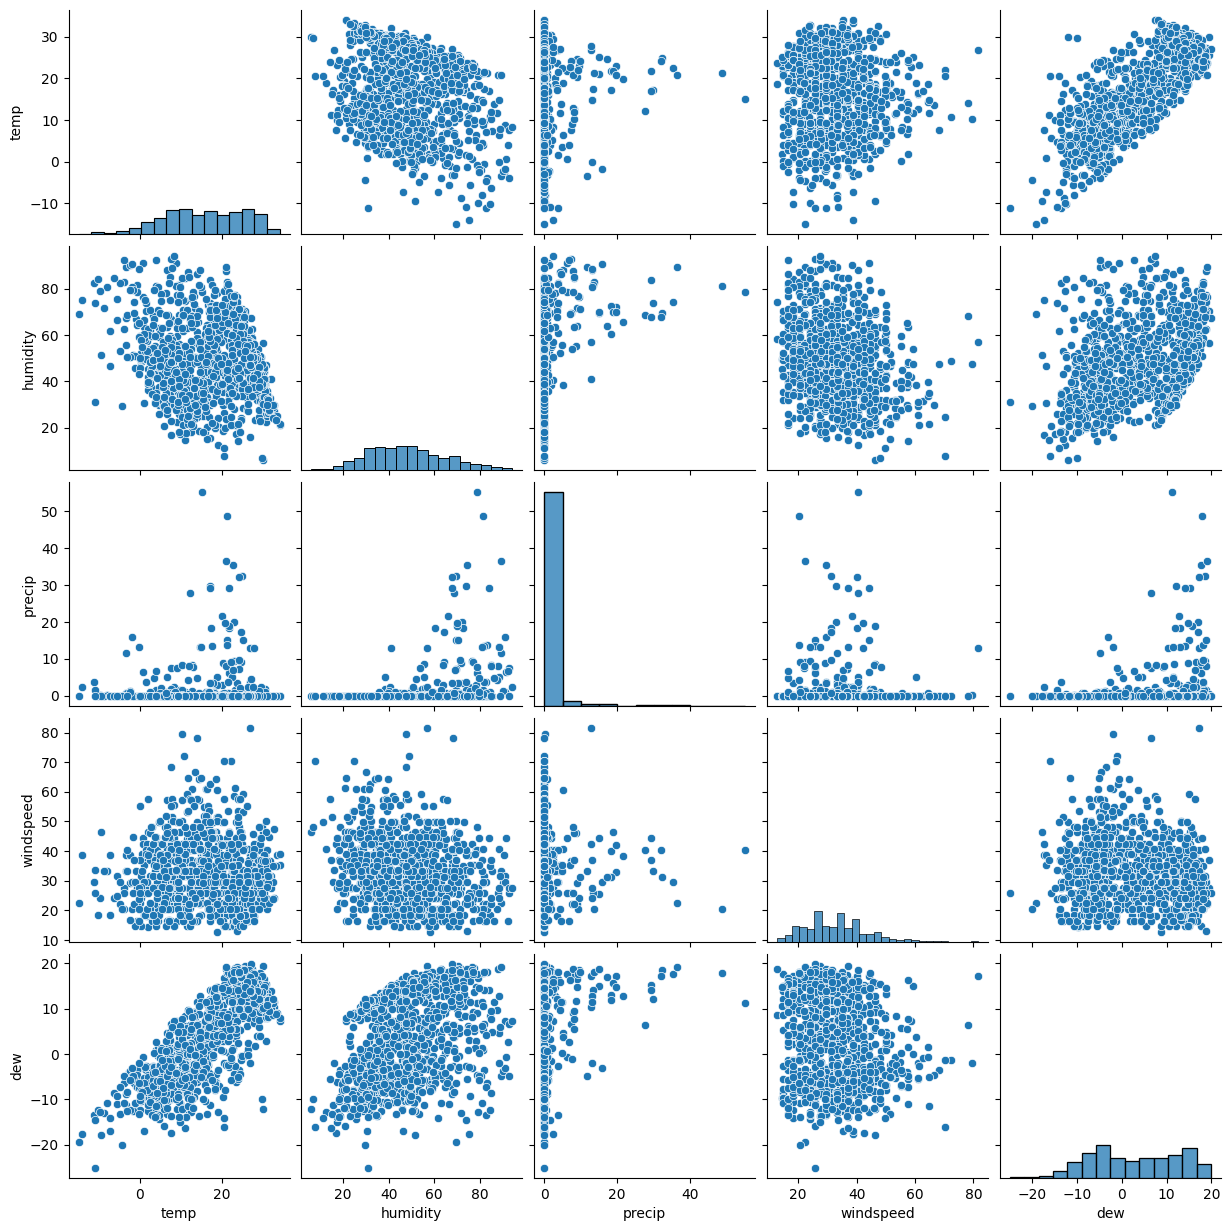

In [15]:
sns.pairplot(data[["temp",	"humidity",	"precip",	"windspeed", "dew"]])

<Axes: >

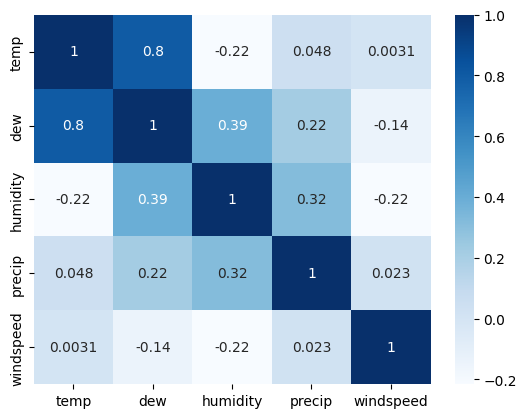

In [16]:
sns.heatmap(data.iloc[:,2:7].corr(),annot=True,cmap="Blues")

## 2. Input selection

In [17]:
X=data[["temp","humidity",	"windspeed"]]
y=data["dew"]

## 3. Train test splitting

In [18]:
# train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
x_train

,temp,humidity,windspeed
77,20.6,26.3,38.8
257,8.3,94.2,27.6
333,23.5,75.2,22.3
955,7.7,48.3,33.3
45,21.6,57.1,14.7
...,...,...,...
297,21.7,67.8,37.0
627,23.9,42.7,49.9
291,17.3,72.4,31.4
521,8.0,37.2,50.0


## 4. Building model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [20]:
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly.shape

(698, 10)

In [21]:
x_train_poly

array([[1.00000e+00, 2.06000e+01, 2.63000e+01, ..., 6.91690e+02,
        1.02044e+03, 1.50544e+03],
       [1.00000e+00, 8.30000e+00, 9.42000e+01, ..., 8.87364e+03,
        2.59992e+03, 7.61760e+02],
       [1.00000e+00, 2.35000e+01, 7.52000e+01, ..., 5.65504e+03,
        1.67696e+03, 4.97290e+02],
       ...,
       [1.00000e+00, 1.73000e+01, 7.24000e+01, ..., 5.24176e+03,
        2.27336e+03, 9.85960e+02],
       [1.00000e+00, 8.00000e+00, 3.72000e+01, ..., 1.38384e+03,
        1.86000e+03, 2.50000e+03],
       [1.00000e+00, 2.33000e+01, 6.22000e+01, ..., 3.86884e+03,
        2.62484e+03, 1.78084e+03]])

In [22]:
model=LinearRegression()
model.fit(x_train_poly,y_train)
a=model.coef_
a

array([ 0.00000000e+00,  7.75458078e-01,  5.61847230e-01,  3.31781429e-02,
        1.55437928e-03,  2.80426616e-03, -1.82037380e-03, -2.77478370e-03,
        4.44084696e-04, -4.79297542e-04])

In [23]:
y_train_pred=model.predict(x_train_poly)
#this is same as: model.intercept_+a[1]*X["humidity"]+a[2]*X["humidity"]**2

### apply on test

In [24]:
x_test_poly = poly.fit_transform(x_test)
x_test_poly.shape

(300, 10)

In [25]:
y_test_pred=model.predict(x_test_poly)

## 5. Diagnosis of the model

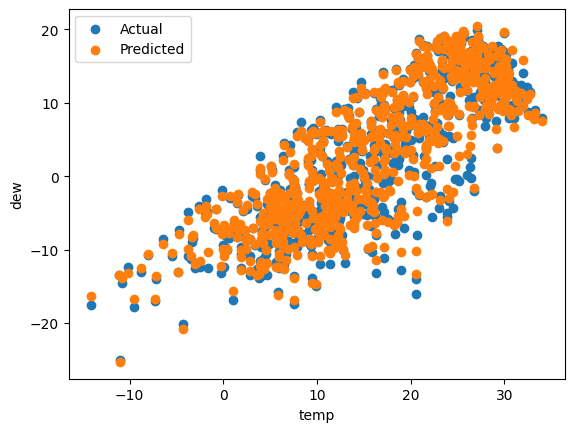

In [26]:
plt.scatter(x_train["temp"],y_train)
plt.scatter(x_train["temp"],y_train_pred)
plt.xlabel("temp")
plt.ylabel("dew")
plt.legend(["Actual","Predicted"])

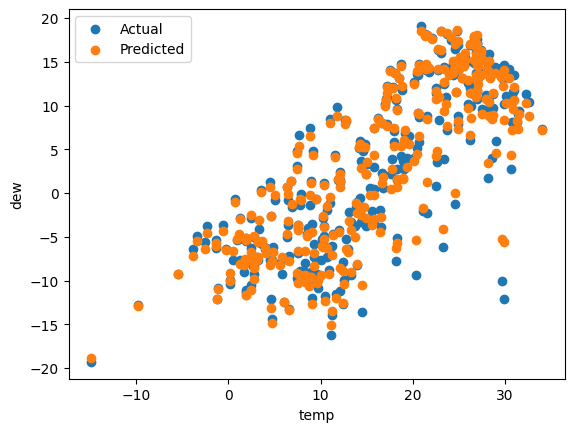

In [27]:
plt.scatter(x_test["temp"],y_test)
plt.scatter(x_test["temp"],y_test_pred)
plt.xlabel("temp")
plt.ylabel("dew")
plt.legend(["Actual","Predicted"])

In [28]:
from sklearn import metrics
trainMSE=metrics.mean_squared_error(y_train,y_train_pred)
trainRMSE=np.sqrt(trainMSE)
trainRMSE

np.float64(1.0449044830314307)

In [29]:
testMSE=metrics.mean_squared_error(y_test,y_test_pred)
testRMSE=np.sqrt(testMSE)
testRMSE

np.float64(1.0835191079289803)

## Polynomial vs linear 

In [30]:
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)
y_train_pred_lin=model_lin.predict(x_train)
y_test_pred_lin=model_lin.predict(x_test)

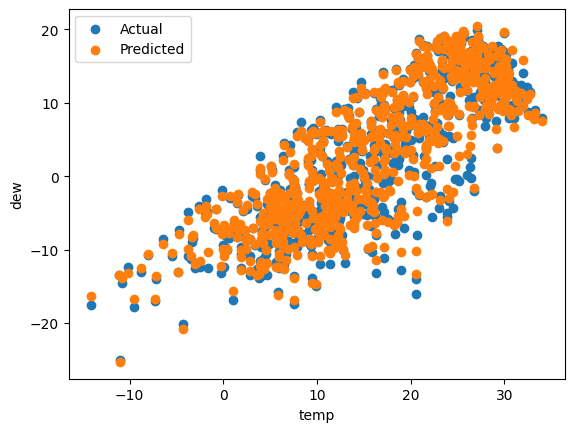

In [31]:
plt.scatter(x_train["temp"],y_train)
plt.scatter(x_train["temp"],y_train_pred)
plt.xlabel("temp")
plt.ylabel("dew")
plt.legend(["Actual","Predicted"])

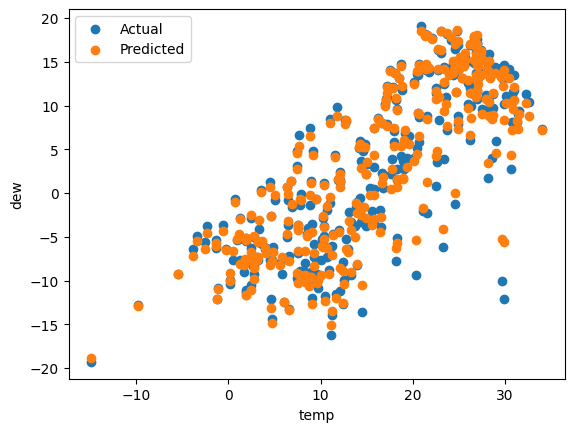

In [32]:
plt.scatter(x_test["temp"],y_test)
plt.scatter(x_test["temp"],y_test_pred)
plt.xlabel("temp")
plt.ylabel("dew")
plt.legend(["Actual","Predicted"])

In [33]:
train_linRMSE=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_lin))
train_linRMSE

np.float64(1.5980727103090968)

In [34]:
test_linRMSE=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_lin))
test_linRMSE

np.float64(1.8563071220909568)